# **Compiling the Results**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import os
from tqdm import tqdm

In [6]:
current_dir = os.getcwd()
print(f"Current Working Directory: {current_dir}")
NNconv_dir_path = "/teamspace/studios/this_studio/all/GNN/13j3p_withBtagLabel_NodeFeature/model_output_arrays/NNConv"
GCNConv_dir_path = "/teamspace/studios/this_studio/all/GNN/13j3p_withBtagLabel_NodeFeature/model_output_arrays/GCNConv"
GatedGraphConv_dir_path = "/teamspace/studios/this_studio/all/GNN/13j3p_withBtagLabel_NodeFeature/model_output_arrays/GatedGraphConv"

Current Working Directory: /teamspace/studios/this_studio/all/GNN/13j3p_withBtagLabel_NodeFeature/model_output_arrays


In [7]:
array_dir_path = [GCNConv_dir_path, NNconv_dir_path, GatedGraphConv_dir_path] #It can be any other path where all .npy files are stored
data_dict = {}
for dir_path in array_dir_path:
    for file in os.listdir(dir_path):
        if file[-4:] != '.npy':
            pbar.update(1)
            continue
                
        print(file)
        data = np.load(os.path.join(dir_path,file))
        data_dict.update({file : data})

GCConv_hd5_EtaPhiPtEBtaglabel.npy
NNConv_hd30_EtaPhiPtEBtaglabel.npy
NNConv_hd5_EtaPhiPtEBtaglabel.npy
NNConv_hd5_EtaPhiPtEBtaglabel_with_proximitySpread.npy
NNConv_hd10_EtaPhiPtEBtaglabel.npy
NNConv_hd15_EtaPhiPtEBtaglabel.npy
NNConv_hd10_EtaPhiPtEBtaglabel_with_proximitySpread.npy
GatedGraphConv_hd30_EtaPhiPtEBtaglabel.npy
GatedGraphConv_hd10_EtaPhiPtEBtaglabel_with_proximitySpread.npy
GatedGraphConv_hd5_EtaPhiPtEBtaglabel_with_proximitySpread.npy
GatedGraphConv_hd5_EtaPhiPtEBtaglabel.npy
GatedGraphConv_hd10_EtaPhiPtEBtaglabel.npy
GatedGraphConv_hd15_EtaPhiPtEBtaglabel.npy
GatedGraphConv_hd15_EtaPhiPtEBtaglabel_with_proximitySpread.npy


In [8]:
len(data_dict)

14

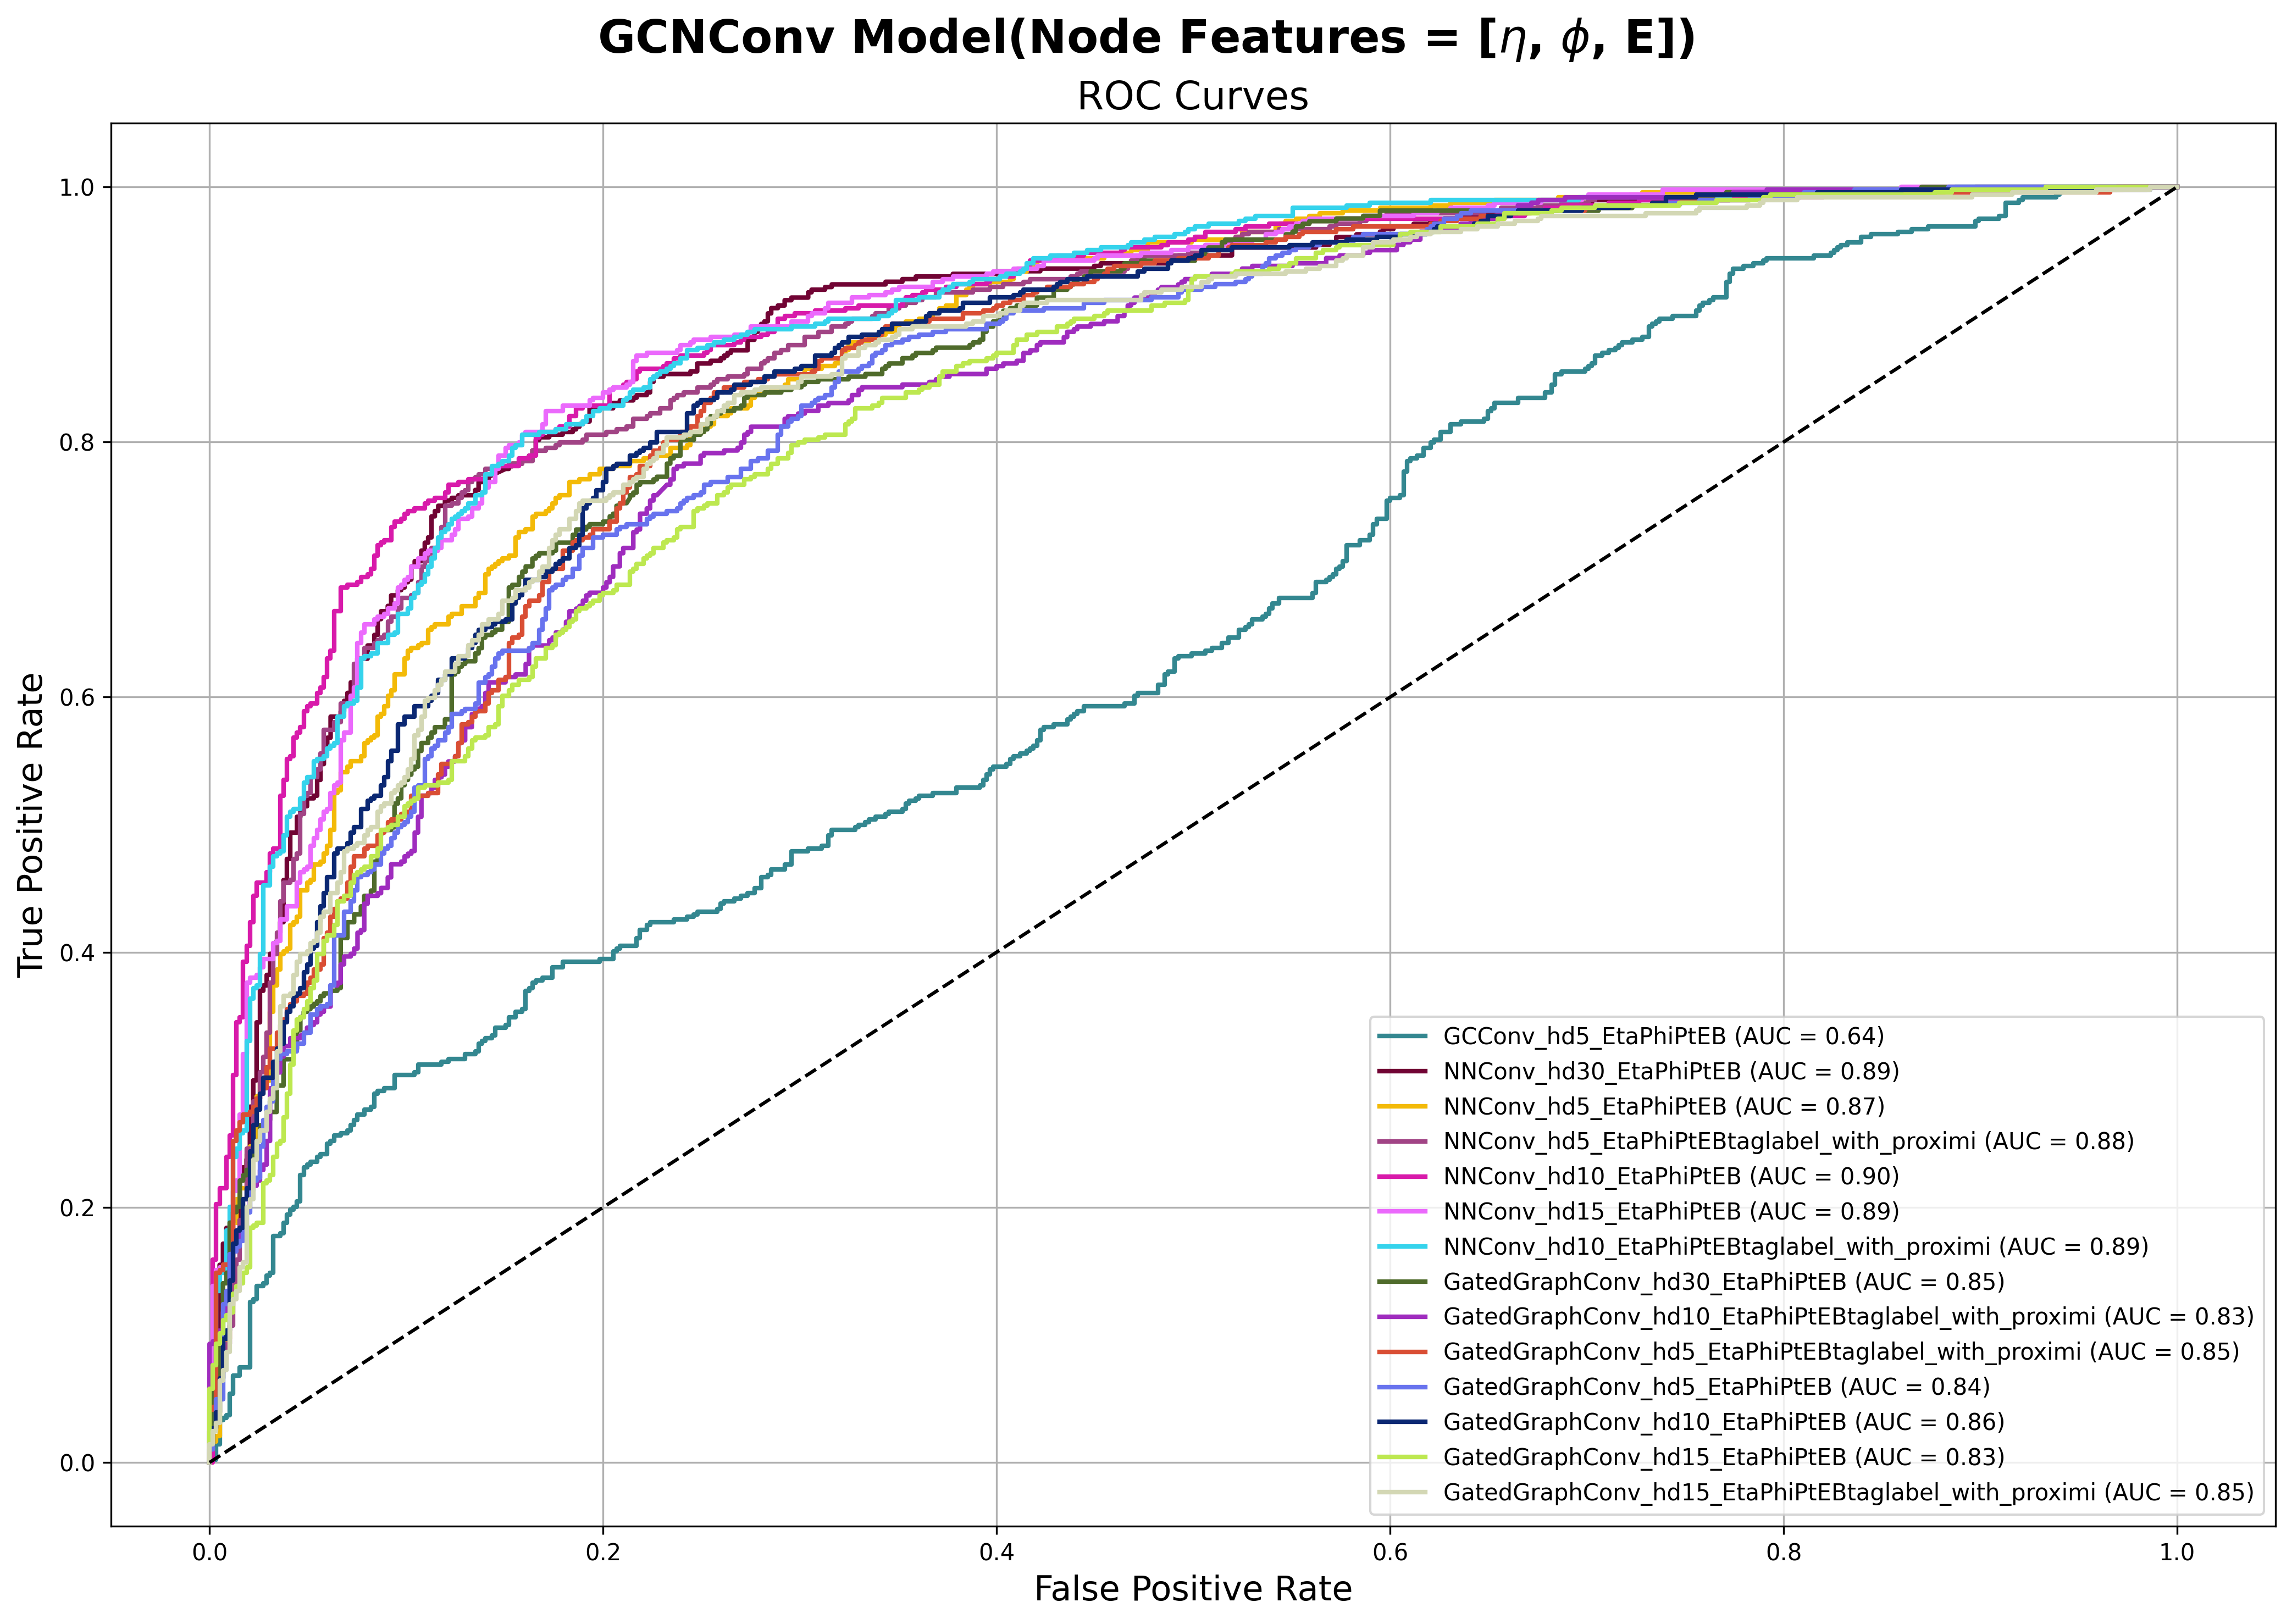

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import random

def get_random_color():
    letters = '0123456789ABCDEF'
    color = '#'
    for i in range(6):
        color += letters[random.randint(0, 15)]
    return color


def plot_roc_auc_and_histogram(data_dict:dict, bins:int = 30) -> None:
    """
    Plots ROC-AUC curves and line plots of predicted probabilities for multiple runs of a model.

    Parameters:
    -----------
    data_dict : dict
        A dictionary where keys are file names and values are 2D numpy arrays.
        Each numpy array has two rows:
        - The first row contains the true labels.
        - The second row contains the corresponding model output probabilities.
    bins : int, optional
        The number of bins to use for the probability distribution plot. Default is 30.

    Returns:
    --------
    None
        Displays a matplotlib plot with two subplots:
        - The first subplot shows ROC-AUC curves for each run.
        - The second subplot shows line plots of predicted probabilities (x-axis: bin midpoints, y-axis: frequency).
    """
    
    # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), dpi = 300)
    fig, ax1 = plt.subplots(1, 1, figsize=(14, 10), dpi = 300)
    for file_name, data in data_dict.items():
        true_labels = data[0, :]
        predicted_probs = data[1, :]

        fpr, tpr, _ = roc_curve(true_labels, predicted_probs)
        roc_auc = auc(fpr, tpr)

        color = get_random_color() # Gives a random color hex code

        ax1.plot(fpr, tpr, lw=2, label=f'{file_name[:-12]} (AUC = {roc_auc:.2f})', color = color)
    
    ax1.plot([0, 1], [0, 1], 'k--')
    ax1.set_xlabel('False Positive Rate', fontsize = 15)
    ax1.set_ylabel('True Positive Rate', fontsize = 15)
    ax1.set_title('ROC Curves', fontsize=17)
    ax1.legend(loc="lower right")
    ax1.grid(True)
    
    plt.suptitle(r'GCNConv Model(Node Features = [$\eta$, $\phi$, E])', fontsize = 20, fontweight = 'bold')
    plt.tight_layout()
    plt.show()


plot_roc_auc_and_histogram(data_dict)

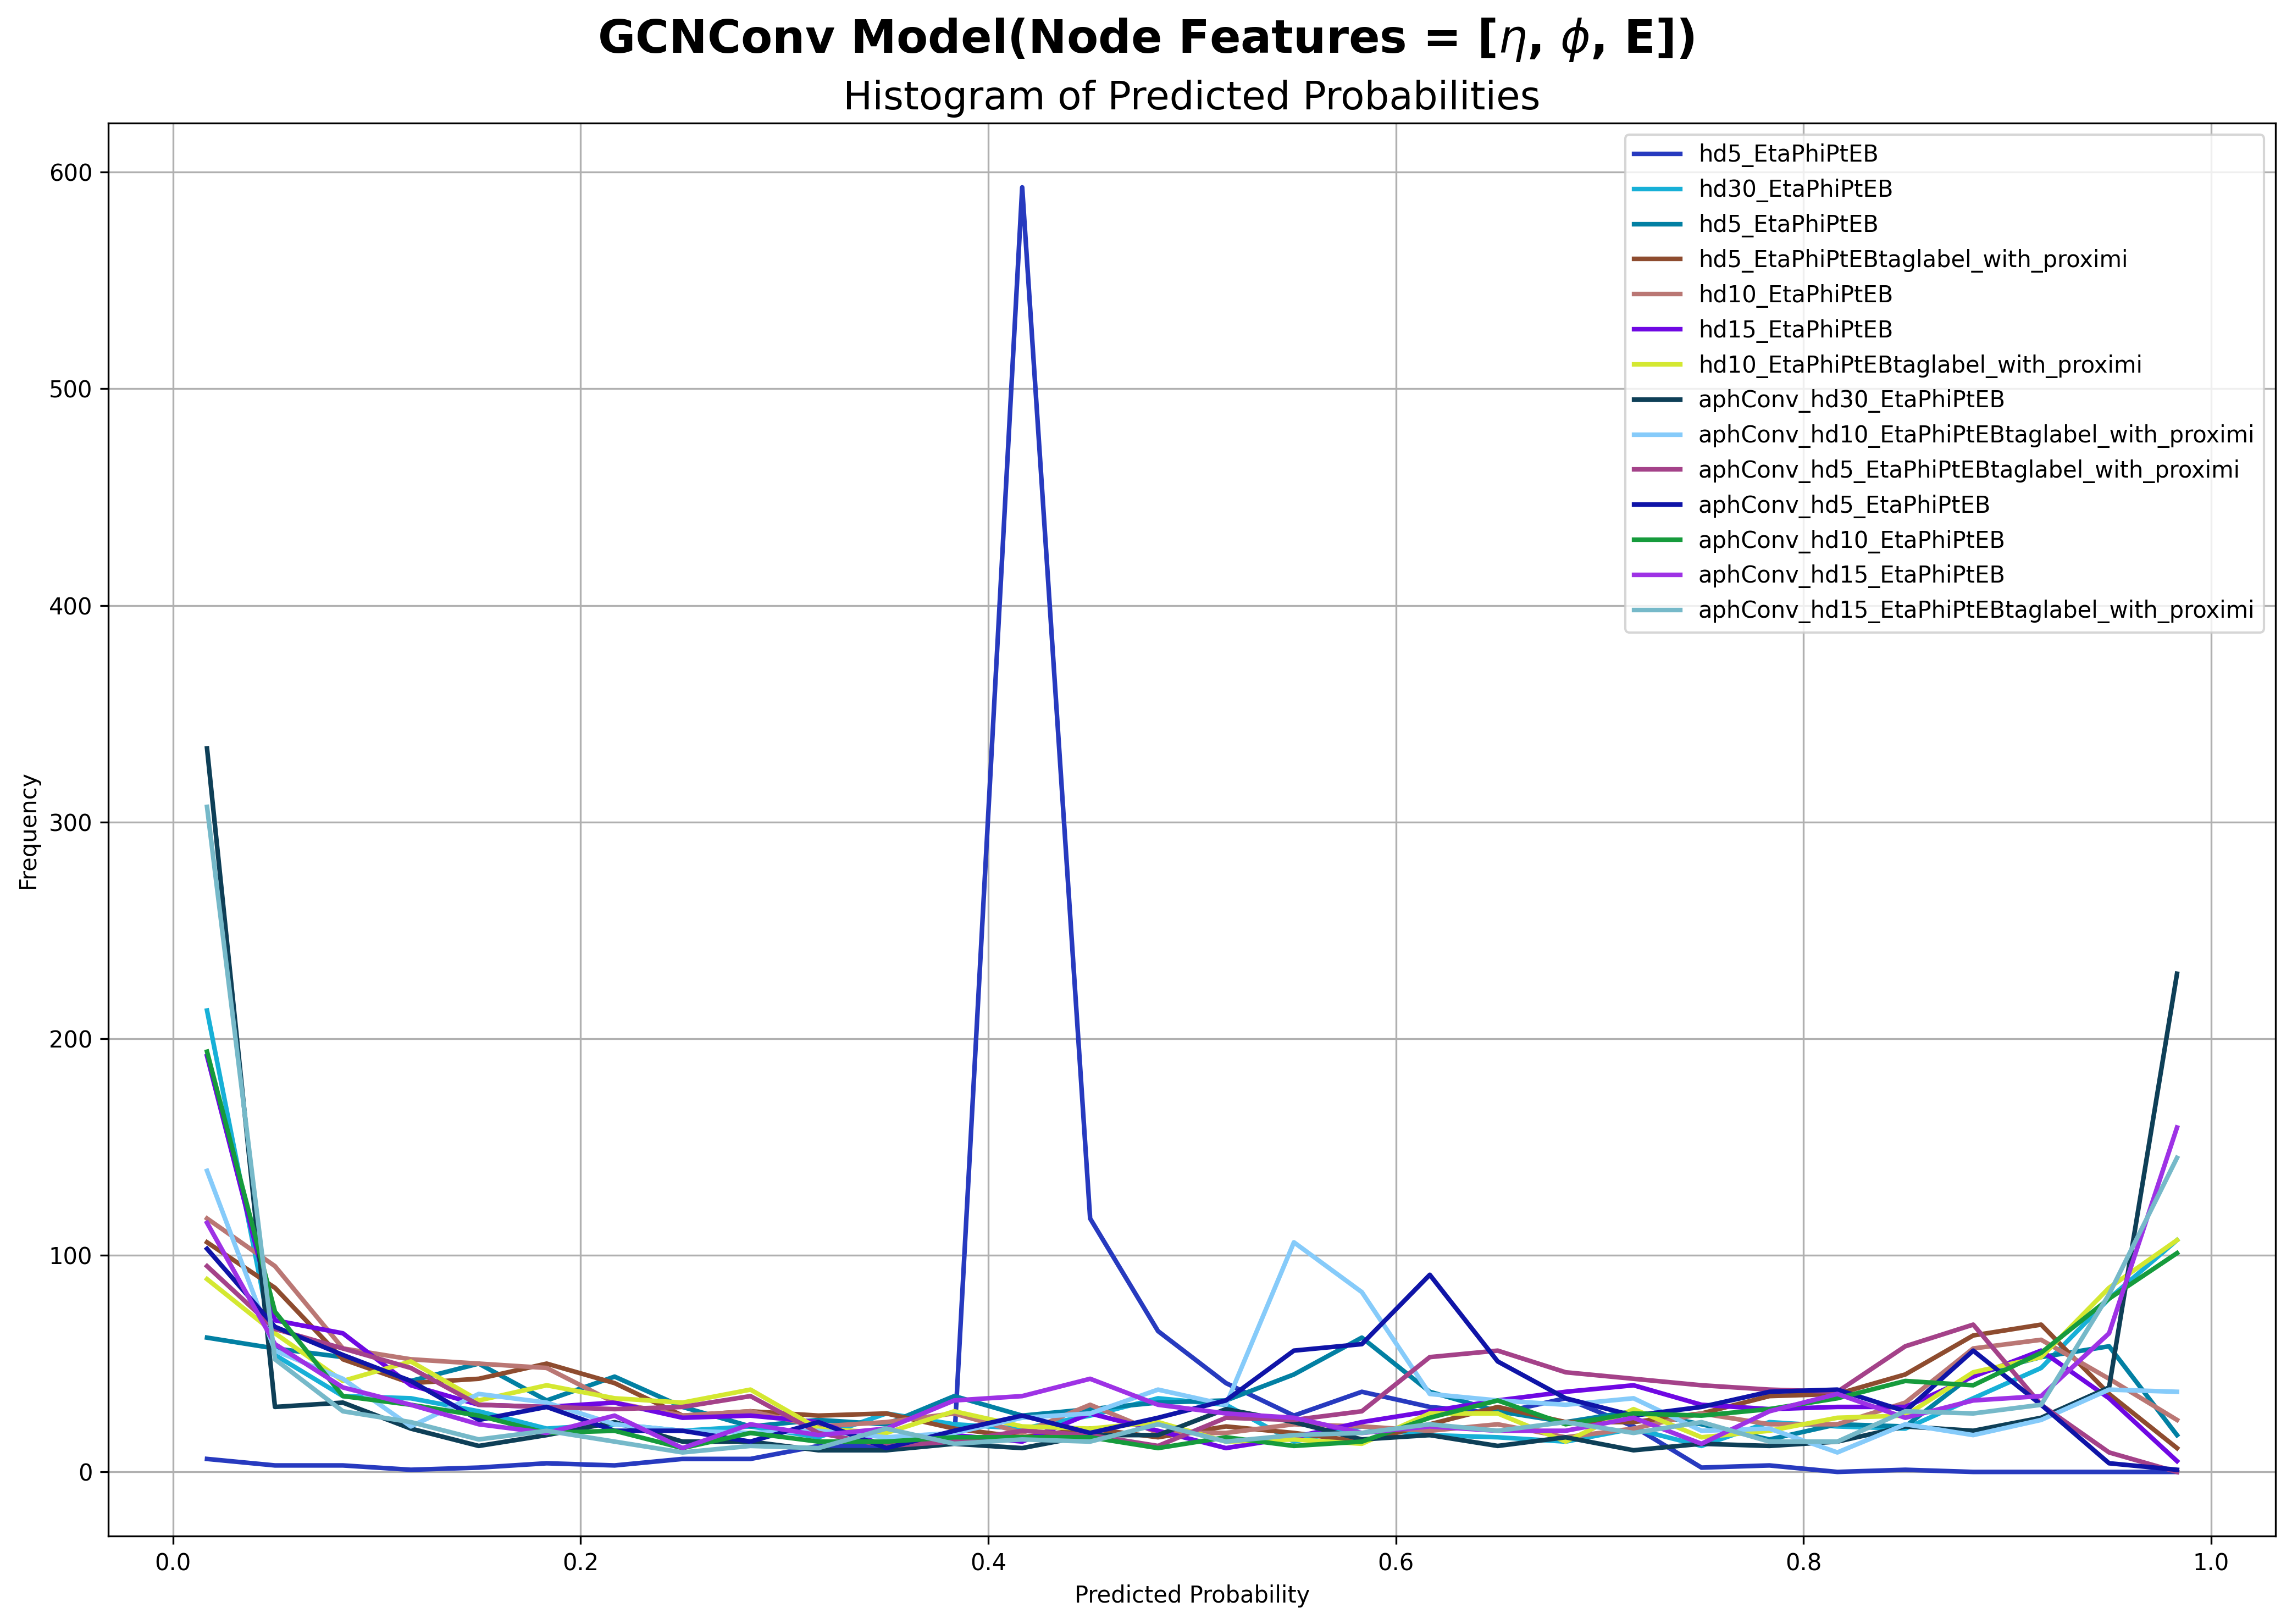

In [12]:
fig, ax1= plt.subplots(1, 1, figsize=(14, 10), dpi = 300)
for file_name, data in data_dict.items():
    true_labels = data[0, :]
    predicted_probs = data[1, :]

    color = get_random_color() # Gives a random color hex code
    frequencies, bin_edges = np.histogram(predicted_probs, bins=30, range=(0, 1))
    bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
    ax1.plot(bin_midpoints, frequencies, lw=2, label=file_name[7:-12], color = color)

ax1.set_xlabel('Predicted Probability')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Predicted Probabilities', fontsize=17)
ax1.legend(loc="upper right")
ax1.grid(True)
    
plt.suptitle(r'GCNConv Model(Node Features = [$\eta$, $\phi$, E])', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()